In [1]:
import geopandas as gpd

### 读取数据

In [2]:
boros = gpd.read_file("./datasets/nybb_16a.zip")
boros

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [3]:
boros.BoroName

0    Staten Island
1           Queens
2         Brooklyn
3        Manhattan
4            Bronx
Name: BoroName, dtype: object

### 地理编码

In [4]:
# 如果报错：ImportError: cannot import name 'encodestring' from 'base64'，可能需要更新 geopy 库
boro_locations = gpd.tools.geocode(boros.BoroName)

In [5]:
boro_locations

,geometry,address
0,POINT (-74.14960 40.58346),"Staten Island, New York, New York, United States"
1,POINT (-73.82831 40.71351),"Queens, New York, New York, United States"
2,POINT (-73.94972 40.65260),"Brooklyn, New York, New York, United States"
3,POINT (-73.95989 40.78962),"Manhattan, New York, New York, United States"
4,POINT (-73.87859 40.84665),"The Bronx, New York, New York, United States"


In [6]:
boros.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
boro_locations.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

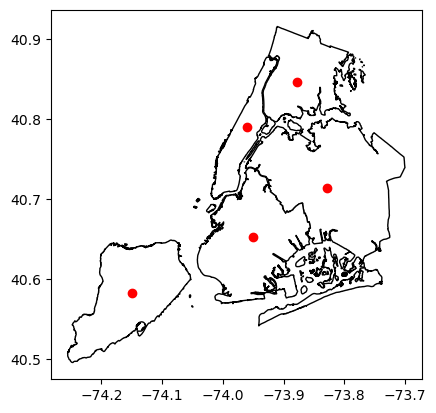

In [8]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots()

boros.to_crs("EPSG:4326").plot(ax=ax , color="white" , edgecolor="black")
boro_locations.plot(ax=ax , color="red")